<a href="https://colab.research.google.com/github/yogiannanf/PembelajaranMesin/blob/main/Praktikum4_Klasifikasi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Jobsheet 4 Klasifikasi

Nama : Yogianna Nur Febrianti

Kelas : TI 3A

Absen/NIM : 28/2241720261

### Praktikum 1

In [1]:
# import library
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns

- Kasus pada data dummy ini memperlihatkan dua kelas yang telah terpisah.

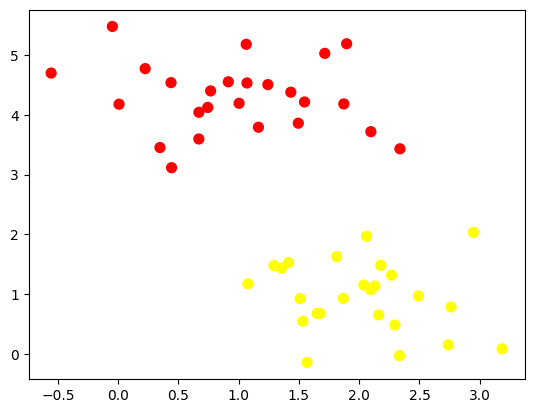

In [2]:
from sklearn.datasets import make_blobs
X, y = make_blobs(n_samples=50, centers=2,
                  random_state=0, cluster_std=0.60)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')

- Sebuah model klasifikasi, garis pemisah data dari dua buah himpunan yang terbentuk diperlukan. Namun, kondisi ini masih menyisakan kasus dimana garis pemisah yang dibutuhkan lebih dari satu garis.

(-1.0, 3.5)

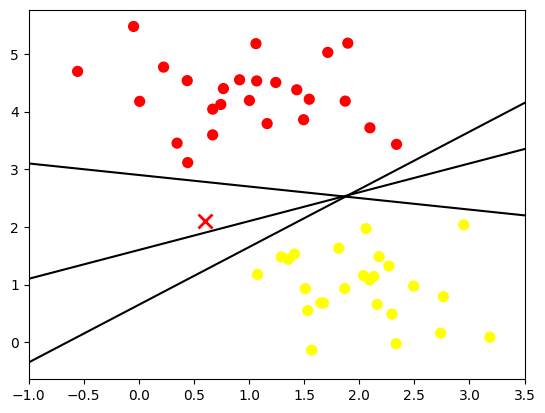

In [3]:
xfit = np.linspace(-1, 3.5)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plt.plot([0.6], [2.1], 'x', color='red', markeredgewidth=2, markersize=10)

for m, b in [(1, 0.65), (0.5, 1.6), (-0.2, 2.9)]:
    plt.plot(xfit, m * xfit + b, '-k')

plt.xlim(-1, 3.5)

- Memperjelas posisi sebuah data terhadap label.

(-1.0, 3.5)

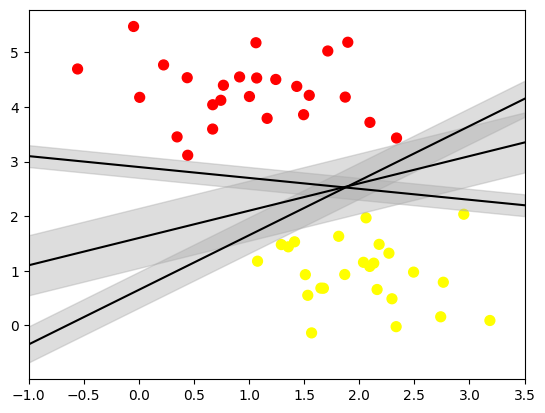

In [4]:
xfit = np.linspace(-1, 3.5)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')

for m, b, d in [(1, 0.65, 0.33), (0.5, 1.6, 0.55), (-0.2, 2.9, 0.2)]:
    yfit = m * xfit + b
    plt.plot(xfit, yfit, '-k')
    plt.fill_between(xfit, yfit - d, yfit + d, edgecolor='none',
                     color='#AAAAAA', alpha=0.4)

plt.xlim(-1, 3.5)

#### Penerappan fitting SVM

In [5]:
from sklearn.svm import SVC # "Support vector classifier"
model = SVC(kernel='linear', C=1E10)
model.fit(X, y)

SVC(C=10000000000.0, kernel='linear')

In [6]:
# buat sebuah fungsi untuk menampilkan fitting data

def plot_svc_decision_function(model, ax=None, plot_support=True):

    if ax is None:
        ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()

    # buat grid untuk evaluasi model
    x = np.linspace(xlim[0], xlim[1], 30)
    y = np.linspace(ylim[0], ylim[1], 30)
    Y, X = np.meshgrid(y, x)
    xy = np.vstack([X.ravel(), Y.ravel()]).T
    P = model.decision_function(xy).reshape(X.shape)

    # plot batas dan margin
    ax.contour(X, Y, P, colors='k',
               levels=[-1, 0, 1], alpha=0.5,
               linestyles=['--', '-', '--'])

    # plot support vectors
    if plot_support:
        ax.scatter(model.support_vectors_[:, 0],
                   model.support_vectors_[:, 1],
                   s=300, linewidth=1, facecolors='none');
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)

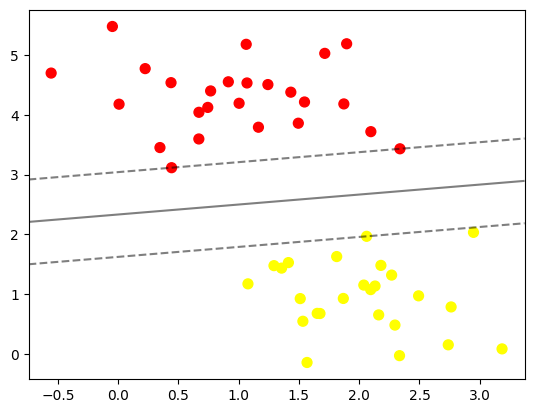

In [7]:
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plot_svc_decision_function(model)

- beberapa titik data yang menyentuh (masuk ke area) garis disebut sebagai support vector.

In [8]:
# untuk mengetahui data yang masuk ke dalam support vector dapat dilakukan
# dengan memanggil support_vectors_

model.support_vectors_

array([[0.44359863, 3.11530945],
       [2.33812285, 3.43116792],
       [2.06156753, 1.96918596]])

- Hasil fitting merupakan kunci keberhasilan suatu classifier (yang hanya dilihat dari posisi dari support vector). Data-data tersebut tidak berkontribusi terhadap loss function yang digunakan untuk fitting model. Untuk lebih memahami hal ini, 60 dan 120 data awal digunakan sebagai contoh dalam bentuk perbandingan.

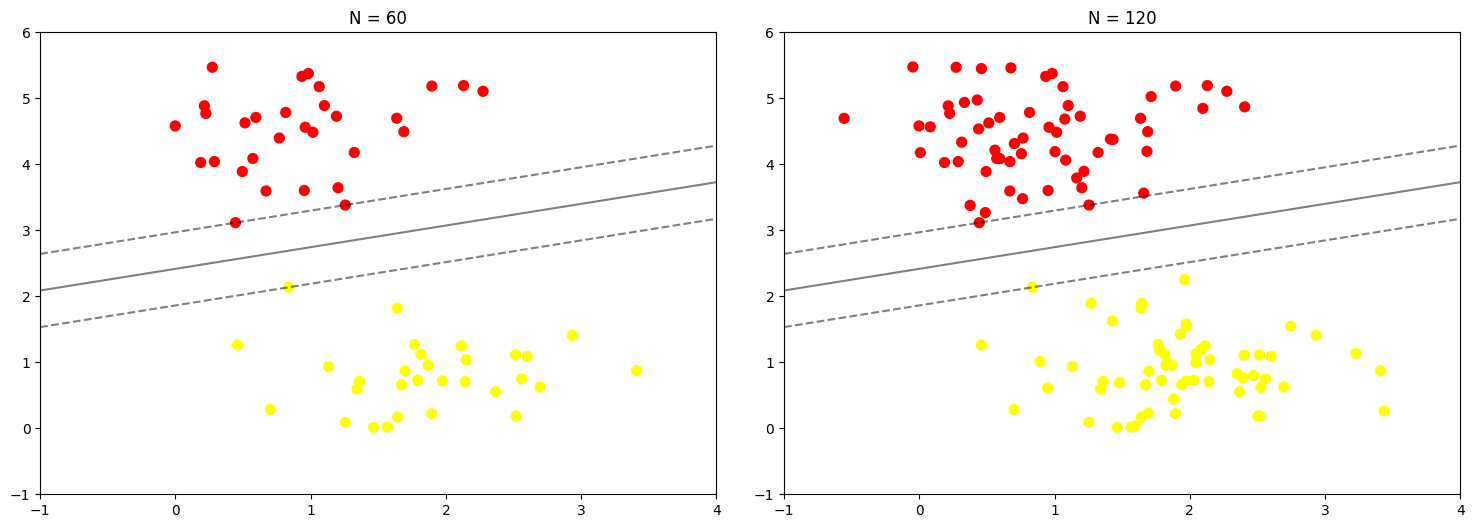

In [9]:
def plot_svm(N=10, ax=None):
    X, y = make_blobs(n_samples=200, centers=2,
                      random_state=0, cluster_std=0.60)
    X = X[:N]
    y = y[:N]
    model = SVC(kernel='linear', C=1E10)
    model.fit(X, y)

    ax = ax or plt.gca()
    ax.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
    ax.set_xlim(-1, 4)
    ax.set_ylim(-1, 6)
    plot_svc_decision_function(model, ax)

fig, ax = plt.subplots(1, 2, figsize=(16, 6))
fig.subplots_adjust(left=0.0625, right=0.95, wspace=0.1)
for axi, N in zip(ax, [60, 120]):
    plot_svm(N, axi)
    axi.set_title('N = {0}'.format(N))

#### Data Tidak Terpisah Secara Linier

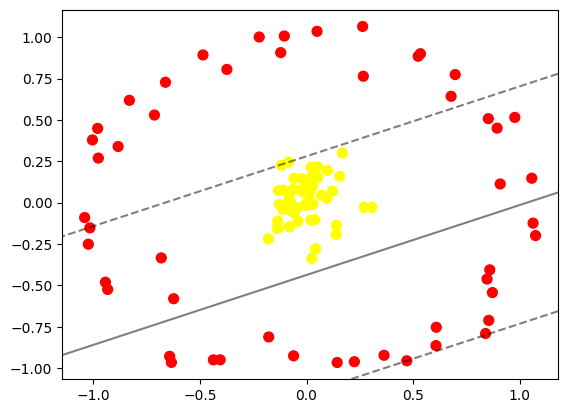

In [42]:
# contoh data tidak terpisah secara linier

from sklearn.datasets import make_circles
X, y = make_circles(100, factor=.1, noise=.1)

clf = SVC(kernel='linear').fit(X, y)

plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plot_svc_decision_function(clf, plot_support=False);

In [11]:
r = np.exp(-(X ** 2).sum(1))

interactive(children=(Dropdown(description='elev', index=2, options=(-90, 45, 30, 20, 10), value=30), IntSlide…

<function __main__.plot_3D(elev=30, azim=30, X=array([[ 0.00120177, -0.01667768],
       [ 0.60779453, -0.86343776],
       [-0.17836646, -0.2188979 ],
       [ 0.12163034,  0.06977187],
       [ 0.03001419, -0.00980755],
       [-0.10982021,  0.0758643 ],
       [-0.03989756, -0.11238674],
       [-0.08446263,  0.24478156],
       [ 0.27110789, -0.0285124 ],
       [-0.63420656, -0.9650245 ],
       [ 0.02474978, -0.33709612],
       [ 1.05739416,  0.14774123],
       [-0.93346461, -0.52436051],
       [ 0.02392361,  0.09195908],
       [-1.01685861, -0.15244405],
       [-0.1189826 ,  0.2255815 ],
       [ 0.0425203 , -0.27858636],
       [-0.62361953, -0.58040958],
       [ 0.15522003,  0.15896349],
       [ 0.07016534,  0.04491203],
       [-1.00487086,  0.37912508],
       [ 0.67875394,  0.64267445],
       [-0.1384304 , -0.15656238],
       [-0.02270695,  0.14500013],
       [-1.02420726, -0.25086151],
       [-0.07987749, -0.14542643],
       [ 0.05131949,  0.2168401 ],
       [-0.063919  ,  0.07903254],
       [-0.05912006,  0.14647653],
       [-0.37375362,  0.80517941],
       [-0.02590043,  0.07759622],
       [ 0.84733853, -0.46156108],
       [ 0.04937401,  1.03536041],
       [ 0.14376957, -0.96555606],
       [-0.00873058,  0.13037005],
       [-0.40542947, -0.94951075],
       [-0.71390928,  0.52944918],
       [ 1.07514977, -0.19877124],
       [ 0.01527616,  0.01243224],
       [-0.10420104,  1.00686416],
       [ 0.36386164, -0.92200899],
       [-0.43706246, -0.94988498],
       [ 0.53480243,  0.89999663],
       [-0.12115856,  0.90665754],
       [-0.07582055, -0.03833686],
       [-0.08183031,  0.03205936],
       [-0.22206324,  1.00097623],
       [ 0.853556  ,  0.50749258],
       [ 0.09803571,  0.19490511],
       [-0.00575153, -0.01095496],
       [-0.06075501, -0.92535655],
       [ 0.09615917,  0.02544702],
       [ 0.0220874 ,  0.21253991],
       [ 0.26653149,  0.76397737],
       [ 0.02088738, -0.10530535],
       [ 0.02810938,  0.10637813],
       [ 0.47083666, -0.95531621],
       [ 0.13873948, -0.19153988],
       [-0.83166564,  0.61843336],
       [-0.68186198, -0.33367591],
       [-0.1353623 , -0.11156343],
       [ 0.01445771,  0.06209502],
       [ 0.14047931, -0.13639024],
       [ 0.89470152,  0.45029686],
       [-0.88434642,  0.33926869],
       [-0.07069458, -0.04587045],
       [-0.07501599,  0.0053398 ],
       [-0.13248441, -0.15268137],
       [-1.0415607 , -0.08974773],
       [ 0.84066032, -0.79050057],
       [ 0.60918132, -0.75273514],
       [ 0.69790454,  0.77405802],
       [ 0.86037022, -0.40582005],
       [ 0.22458909, -0.9609504 ],
       [ 0.52417985,  0.88482825],
       [-0.05752228, -0.06416552],
       [-0.04422424, -0.03035223],
       [-0.97735732,  0.26939069],
       [-0.17753778, -0.81125763],
       [ 1.06357918, -0.12362352],
       [ 0.85549566, -0.71109191],
       [-0.98044737,  0.44880596],
       [ 0.26359441,  1.06455645],
       [ 0.87256445, -0.54333671],
       [-0.66209399,  0.72762565],
       [-0.11038273, -0.03980504],
       [ 0.97775816,  0.51523624],
       [-0.09003775, -0.01125855],
       [-0.94398901, -0.48059385],
       [-0.01653606,  0.06404786],
       [ 0.3064998 , -0.02906628],
       [-0.12724235, -0.01019218],
       [ 0.03914967, -0.10202413],
       [-0.64245775, -0.92832878],
       [ 0.05293339,  0.15170814],
       [ 0.90925757,  0.11306662],
       [ 0.02593897,  0.16050081],
       [-0.48612898,  0.89253191],
       [ 0.16902737,  0.30049063],
       [-0.13111057,  0.07329031]]), y=array([1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0,
       1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1]))>

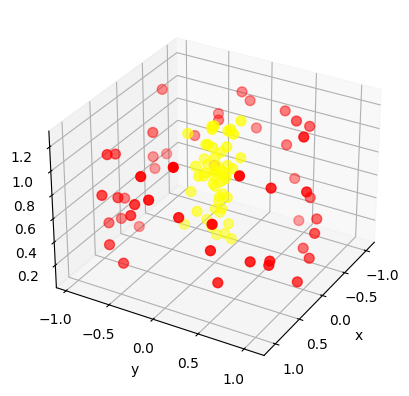

In [43]:
from mpl_toolkits import mplot3d
from ipywidgets import interact, fixed # import tambahan untuk mengatasi error

def plot_3D(elev=30, azim=30, X=X, y=y):
    ax = plt.subplot(projection='3d')
    ax.scatter3D(X[:, 0], X[:, 1], r, c=y, s=50, cmap='autumn')
    ax.view_init(elev=elev, azim=azim)
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_zlabel('r')

interact(plot_3D, elev=[-90, 45, 30, 20 , 10], azip=(-180, 180),
         X=fixed(X), y=fixed(y))

In [27]:
clf = SVC(kernel='rbf', C=1E6)
clf.fit(X, y)

SVC(C=1000000.0)

In [28]:
SVC(C=1000000.0)

SVC(C=1000000.0)

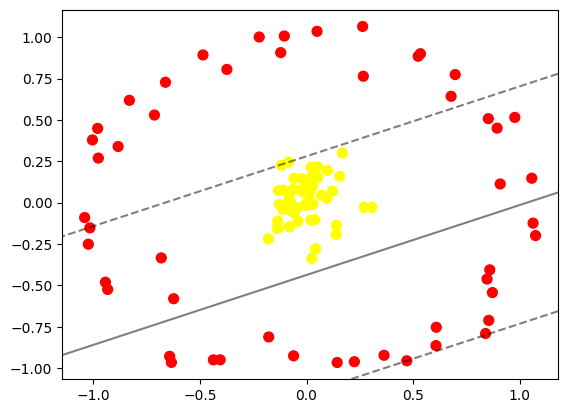

In [51]:
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plot_svc_decision_function(clf)
plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1],
            s=300, lw=1, facecolors='none')

#### Data Overlap

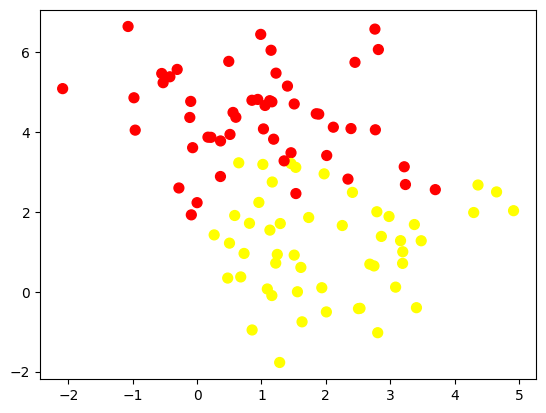

In [31]:
X, y = make_blobs(n_samples=100, centers=2,
                  random_state=0, cluster_std=1.2)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn');

- Perubahan pada C berdampak pada hasil fitting final

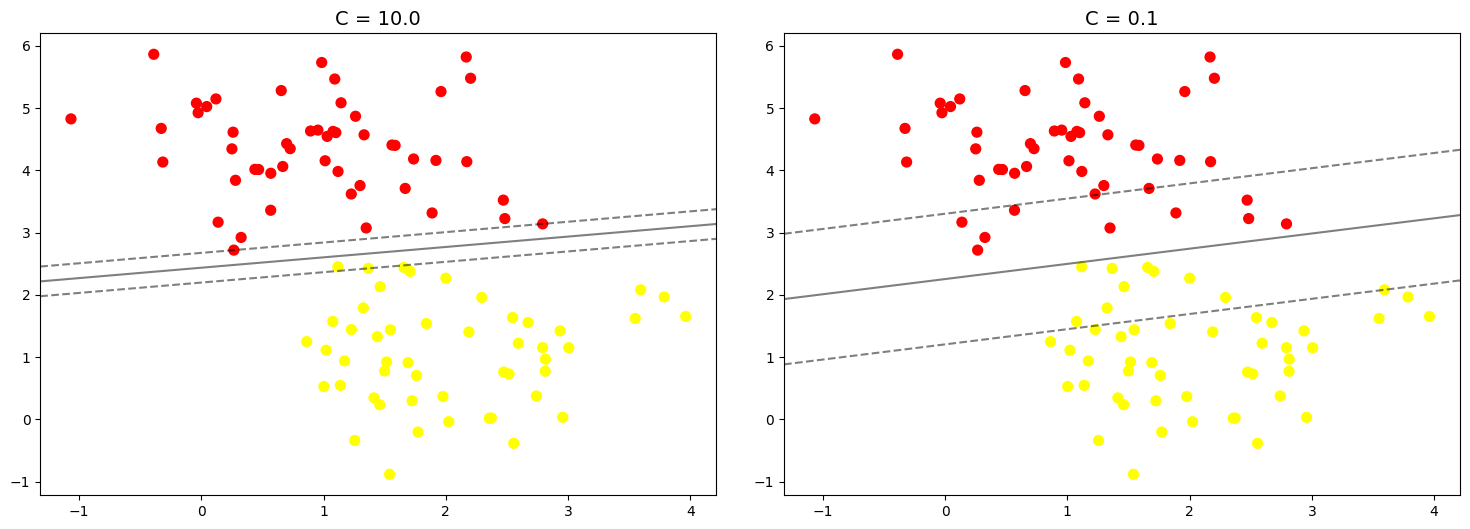

In [32]:
X, y = make_blobs(n_samples=100, centers=2,
                  random_state=0, cluster_std=0.8)

fig, ax = plt.subplots(1, 2, figsize=(16, 6))
fig.subplots_adjust(left=0.0625, right=0.95, wspace=0.1)

for axi, C in zip(ax, [10.0, 0.1]):
    model = SVC(kernel='linear', C=C).fit(X, y)
    axi.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
    plot_svc_decision_function(model, axi)
    axi.scatter(model.support_vectors_[:, 0],
                model.support_vectors_[:, 1],
                s=300, lw=1, facecolors='none');
    axi.set_title('C = {0:.1f}'.format(C), size=14)